

---

---




# Treinamento de uma rede MLP para relação XOR - Scikit-learn

Este notebook mostra o uso do modelo [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#) da biblioteca [Scikit-learn](https://scikit-learn.org/stable/index.html) para criar e treinar uma rede Perceptrons Multicamadas (Multi-Layers Perceptrons - MLP) para a relação lógica XOR:

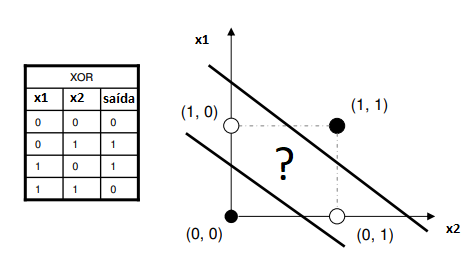




---

---





## Bibliotecas/pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neural_network import MLPClassifier

## Função que mostra as fronteiras de decisão 

Baseada em: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
def plota_fronteira_decisao(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
  step = 0.01
  cm = plt.cm.RdBu
  #cm = plt.cm.bone
  thr = 0.0
  xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
  if hasattr(classifier, 'decision_function'):
    Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  else:
    Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, abs(Z), cmap=cm, alpha=0.8)
  plt.colorbar()
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.xticks((0.0, 1.0))
  plt.yticks((0.0, 1.0))
  plt.title(title)


## Relação XOR



In [4]:
# Dados de entrada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]],
            dtype=float)
# Saídas XOR
y_XOR = np.array([0, 1, 1, 0])

## Cria e treina uma rede MLP - configuração mínima para o XOR

Cria e treina rede uma rede MLP composta por uma camada escondida (intermediária) com dois neurônios:

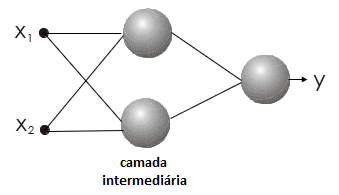



**Configuração mínima para o aprendizado da relação XOR.**



In [5]:
# Criando uma rede MLP
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation = 'logistic', 
                    solver='sgd',learning_rate_init = 0.5, 
                    learning_rate = 'constant', tol = 1e-10, 
                    n_iter_no_change = 100, max_iter=50000, random_state=42)
#mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs')

# Treinando a rede
mlp.fit(X, y_XOR)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,),
              learning_rate_init=0.5, max_iter=50000, n_iter_no_change=100,
              random_state=42, solver='sgd', tol=1e-10)

## Predição (teste da rede MLP treinada)


In [6]:
mlp.predict(X)

array([0, 1, 1, 0])

## Plota a fronteira de decisão

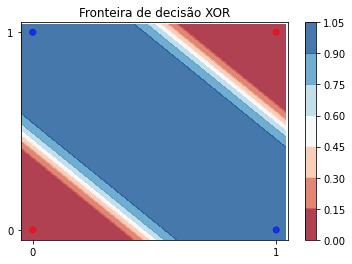

In [7]:
plota_fronteira_decisao(mlp, X, y_XOR, 'Fronteira de decisão XOR')

## Probabilidades estimadas para cada classe

O método [.predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba) mostra as probilidades estimadas pelo modelo (classificador) MLP para cada uma das classes: classe 0 e classe 1.

In [8]:
print("Probabilidades estimadas:\n [Classe 0, Classe 1]\n",mlp.predict_proba(X))

Probabilidades estimadas:
 [Classe 0, Classe 1]
 [[0.99836241 0.00163759]
 [0.00163248 0.99836752]
 [0.00163248 0.99836752]
 [0.99836747 0.00163253]]


## Cria e treina outra rede MLP (com mais neurônios)

Cria e treina rede uma rede MLP com 5 neurônios na camada escondida:

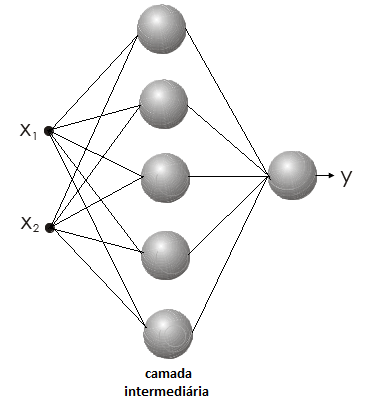

In [9]:
# Criando uma rede MLP
mlp = MLPClassifier(hidden_layer_sizes=(5,), solver='adam', activation='tanh', 
                    max_iter = 10000, random_state=42)
#mlp = MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=(5,), batch_size = 1, random_state=10)

# Treinando a rede
mlp.fit(X, y_XOR)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5,), max_iter=10000,
              random_state=42)

In [10]:
mlp.predict(X)

array([0, 1, 1, 0])

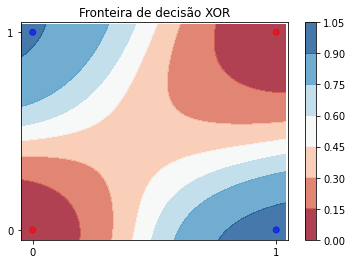

In [11]:
plota_fronteira_decisao(mlp, X, y_XOR, 'Fronteira de decisão XOR')

In [12]:
print("Probabilidades estimadas:\n [Classe 0, Classe 1]\n",mlp.predict_proba(X))

Probabilidades estimadas:
 [Classe 0, Classe 1]
 [[0.93305971 0.06694029]
 [0.09098945 0.90901055]
 [0.0569016  0.9430984 ]
 [0.93451483 0.06548517]]
